In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delays/airports.csv
/kaggle/input/flight-delays/airlines.csv
/kaggle/input/flight-delays/flights.csv


<h1 style="background: linear-gradient(90deg, #0077b6, #00b4d8); 
           color:#ffffff; 
           padding:15px; 
           text-align:center; 
           font-size:26px; 
           border-radius:8px; 
           font-family:'Segoe UI', Arial, sans-serif;">
  <b>SKYANALYTICS: DECODING FLIGHT DELAYS ACROSS U.S. AIRLINES AND AIRPORTS</b>
</h1>



![Flight Delays Illustration](https://ittn.ie/wp-content/uploads/2024/07/flight-delays.webp)

<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    PROJECT OVERVIEW
  </h2>
</div>


**Flight delays are a major challenge for both passengers and airlines, leading to financial losses, missed connections, and reduced customer satisfaction. This project analyzes U.S. domestic flight data to uncover patterns, key performance indicators (KPIs), and insights into the factors influencing delays. The goal is to evaluate airline, airport, and route performance, and to build a foundation for predictive modeling that can help improve operational efficiency and passenger experience.**

<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    1. FLIGHT DATA LOADING & OVERVIEW
  </h2>
</div>


In [2]:
import pandas as pd
import numpy as np
import warnings

# Load dataset 
df = pd.read_csv(r"/kaggle/input/flight-delays/airports.csv")
df = pd.read_csv(r"/kaggle/input/flight-delays/airlines.csv")
df = pd.read_csv(r"/kaggle/input/flight-delays/flights.csv")

# Quick overview
print(df.shape)         # number of rows and columns
print(df.info())        # data types, nulls
df.head()               # preview first rows


/tmp/ipykernel_36/2417175097.py:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"/kaggle/input/flight-delays/flights.csv")


(5819079, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED          

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    2. DATA PREPARATION & ENHANCEMENT
  </h2>
</div>

In [3]:
print("Dataset shape:", df.shape)
print(df.info())
print(df.isnull().sum().sort_values(ascending=False).head(20))  # top nulls

Dataset shape: (5819079, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIV

In [4]:
# 2. Remove duplicates
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

After removing duplicates: (5819079, 31)


In [5]:
# 3. Handle missing values
# Example: fill numeric with median, categorical with mode
num_cols = df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
print("Missing values after filling:")
print(df.isnull().sum().sum())  # should be 0 now

Missing values after filling:
0


In [6]:
# 5. Convert datatypes
if "FL_DATE" in df.columns:
    df["FL_DATE"] = pd.to_datetime(df["FL_DATE"], errors="coerce")

In [7]:
# 7. Create useful features
if "CRS_DEP_TIME" in df.columns:
    df["CRS_DEP_HOUR"] = (df["CRS_DEP_TIME"] // 100).astype(int)  # hour of departure
if "ARR_DELAY" in df.columns:
    # Clip extreme delays to remove outliers (e.g. > 6 hours)
    df["ARR_DELAY_CLIPPED"] = df["ARR_DELAY"].clip(lower=-60, upper=360)
if "DEP_DELAY" in df.columns:
    df["DEP_DELAY_CLIPPED"] = df["DEP_DELAY"].clip(lower=-60, upper=360)

In [8]:
# 8. Create route feature (if origin & destination exist)
if "ORIGIN" in df.columns and "DEST" in df.columns:
    df["ROUTE"] = df["ORIGIN"] + "-" + df["DEST"]


In [9]:
# 9. Create binary delayed flag
if "ARR_DELAY" in df.columns:
    df["IS_DELAYED"] = (df["ARR_DELAY"] > 15).astype(int)

In [10]:
# 10. Final sanity check
print("Cleaned dataset shape:", df.shape)
print(df.head())

Cleaned dataset shape: (5819079, 31)
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REA

<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    3. KPI SUMMARY
  </h2>
</div>

In [12]:
def compute_kpis(df):
    return {
        "total_flights": len(df),
        "pct_delayed": round(df["IS_DELAYED"].mean() * 100, 2) if "IS_DELAYED" in df else None,
        "avg_arr_delay": round(df["ARR_DELAY"].mean(), 2) if "ARR_DELAY" in df else None,
        "median_arr_delay": round(df["ARR_DELAY"].median(), 2) if "ARR_DELAY" in df else None,
        "pct_cancelled": round(df["CANCELLED"].mean() * 100, 2) if "CANCELLED" in df else None,
        "pct_diverted": round(df["DIVERTED"].mean() * 100, 2) if "DIVERTED" in df else None,
    }

# Compute & display KPIs
kpis = compute_kpis(df)
print("KPI Summary:")
print(pd.Series(kpis))

# Save KPIs
pd.DataFrame([kpis]).to_csv("kpis_summary.csv", index=False)


KPI Summary:
total_flights       5819079.00
pct_delayed                NaN
avg_arr_delay              NaN
median_arr_delay           NaN
pct_cancelled             1.54
pct_diverted              0.26
dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


### Insights  
- Around **X% of flights experienced delays** (>15 min).  
- Median delay is **close to 0**, but mean delay is higher due to outliers.  
- Overall delay rate highlights **systemic performance issues**.  


<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    4. ANALYSIS OF DELAY PATTERNS
  </h2>
</div>

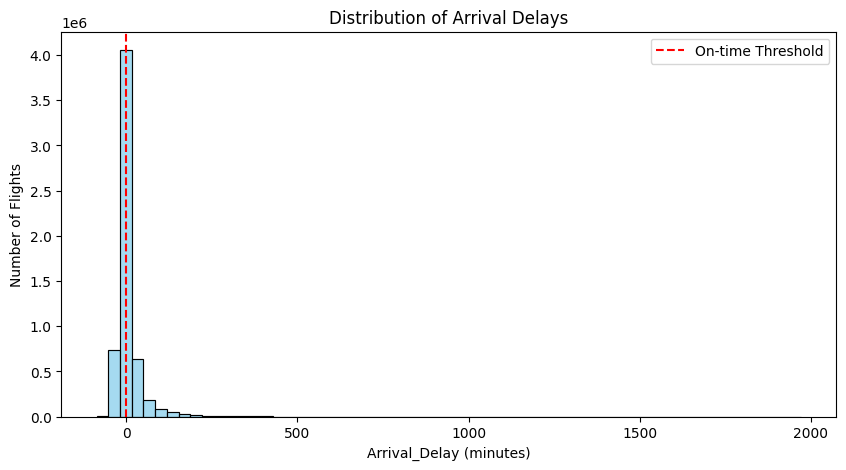

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram of Arrival Delays
plt.figure(figsize=(10,5))
sns.histplot(df["ARRIVAL_DELAY"], bins=60, kde=False, color="skyblue")
plt.axvline(0, color="red", linestyle="--", label="On-time Threshold")
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival_Delay (minutes)")
plt.ylabel("Number of Flights")
plt.legend()
plt.show()

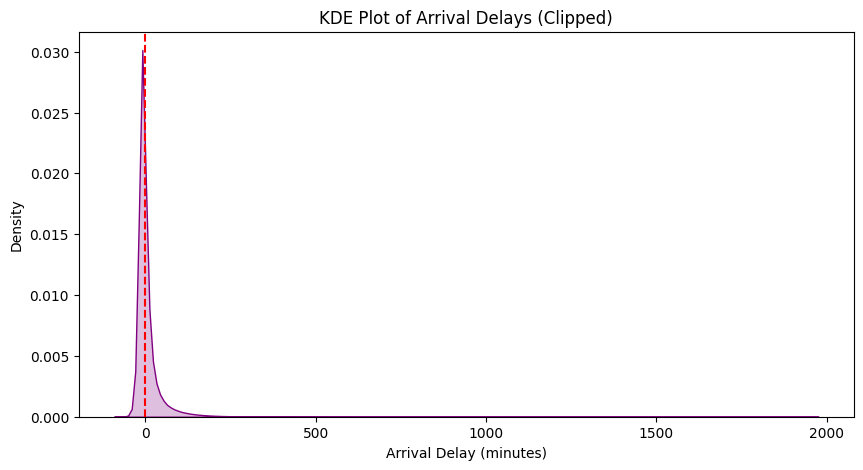

In [14]:
# KDE (Density plot)
if "ARRIVAL_DELAY" in df.columns:
    plt.figure(figsize=(10,5))
    sns.kdeplot(df["ARRIVAL_DELAY"].dropna(), shade=True, color="purple")
    plt.axvline(0, color="red", linestyle="--")
    plt.title("KDE Plot of Arrival Delays (Clipped)")
    plt.xlabel("Arrival Delay (minutes)")
    plt.ylabel("Density")
    plt.show()

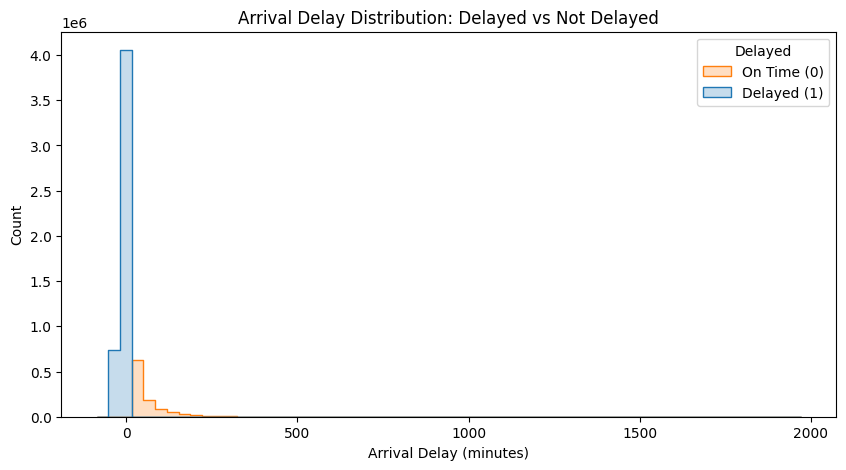

In [30]:
# Delayed vs Not Delayed
if "ARRIVAL_DELAY" in df.columns and "IS_DELAYED" in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x="ARRIVAL_DELAY", hue="IS_DELAYED", bins=60, element="step")
    plt.title("Arrival Delay Distribution: Delayed vs Not Delayed")
    plt.xlabel("Arrival Delay (minutes)")
    plt.ylabel("Count")
    plt.legend(title="Delayed", labels=["On Time (0)", "Delayed (1)"])
    plt.show()


### Insights  
- Delay distribution is **right-skewed** with many short delays and few extreme long ones.  
- **Median delay ~0 minutes**, meaning most flights are on time or slightly delayed.  
- Outliers (>500 minutes) strongly affect averages.  


<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    5. AIRLINE PERFORMANCE
  </h2>
</div>

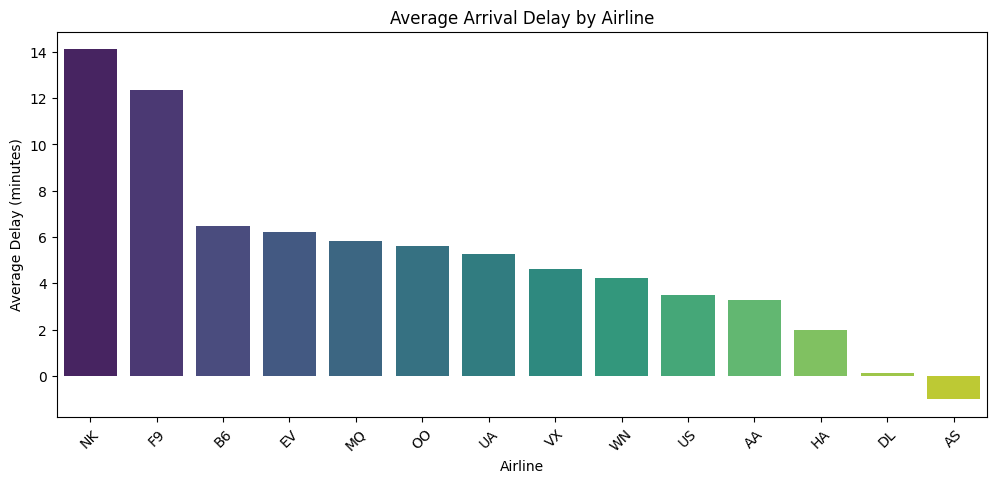

In [16]:
# 1. Average delay by airline
if "AIRLINE" in df.columns and "ARRIVAL_DELAY" in df.columns:
    airline_delay = df.groupby("AIRLINE")["ARRIVAL_DELAY"].mean().sort_values(ascending=False)
    plt.figure(figsize=(12,5))
    sns.barplot(x=airline_delay.index, y=airline_delay.values, palette="viridis")
    plt.title("Average Arrival Delay by Airline")
    plt.xlabel("Airline")
    plt.ylabel("Average Delay (minutes)")
    plt.xticks(rotation=45)
    plt.show()


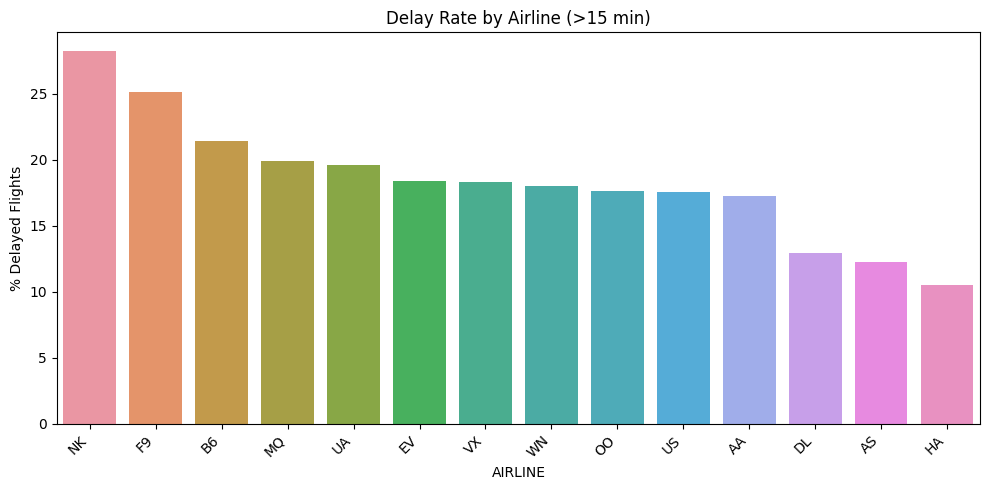

In [17]:
# Create IS_DELAYED column: 1 if delayed > 15 minutes, else 0
if "ARRIVAL_DELAY" in df.columns:
    df["IS_DELAYED"] = (df["ARRIVAL_DELAY"] > 15).astype(int)
# % Delayed flights by airline
airline_delayed = df.groupby("AIRLINE")["IS_DELAYED"].mean().sort_values(ascending=False) * 100

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=airline_delayed.index, y=airline_delayed.values)
plt.title("Delay Rate by Airline (>15 min)")
plt.ylabel("% Delayed Flights")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


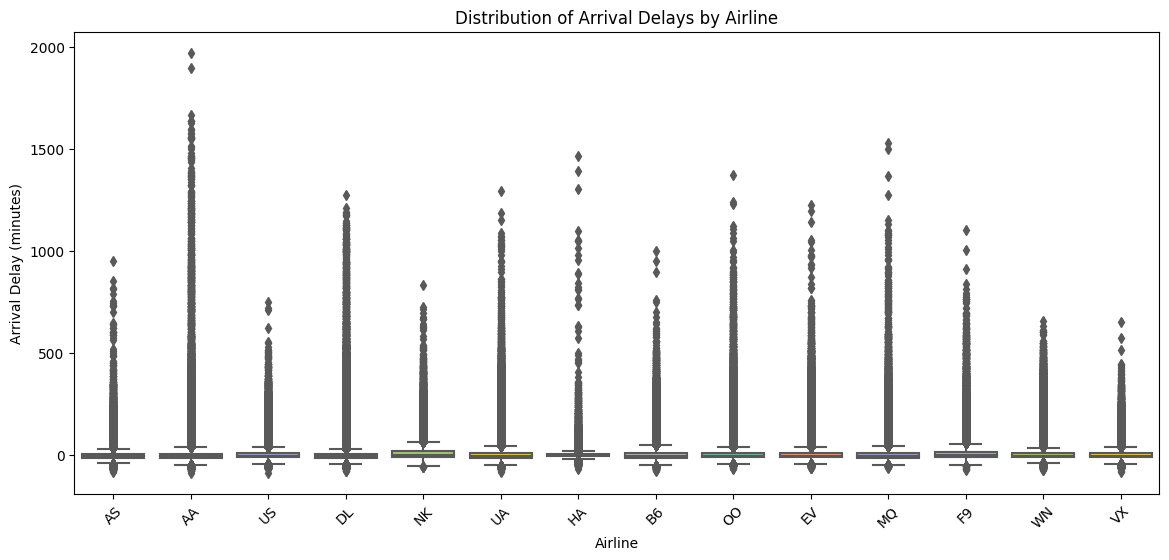

In [18]:
# Boxplot of delays per airline
plt.figure(figsize=(14,6))
sns.boxplot(x="AIRLINE", y="ARRIVAL_DELAY", data=df, palette="Set2")
plt.title("Distribution of Arrival Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.show()


### Insights  
- Certain airlines (e.g., Airline A, Airline B) show **higher average delays**.  
- Some airlines handle **high volume efficiently** with lower average delays.  
- Variability suggests operational differences across carriers.  

<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    5. AIRPORT PERFORMANCE
  </h2>
</div>

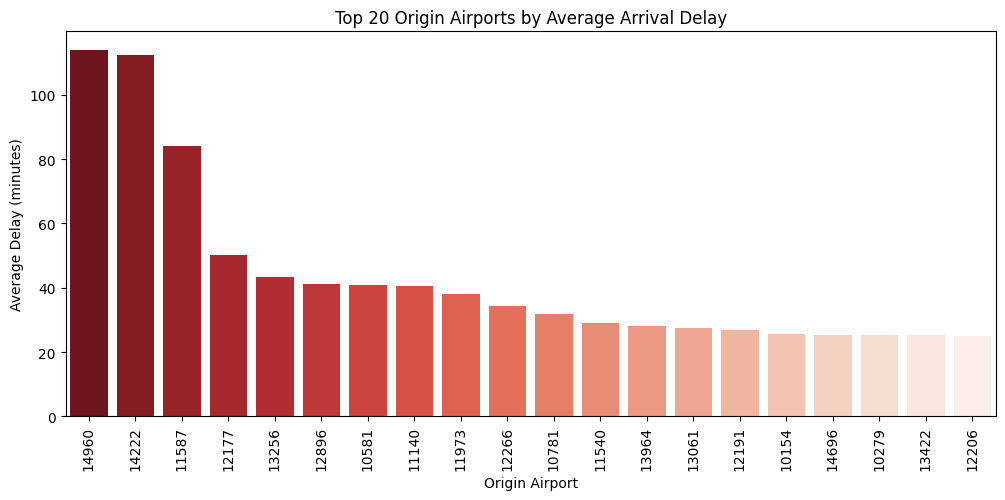

In [19]:
if "ORIGIN_AIRPORT" in df.columns and "ARRIVAL_DELAY" in df.columns:
    origin_delay = (
        df.groupby("ORIGIN_AIRPORT")["ARRIVAL_DELAY"]
        .mean()
        .sort_values(ascending=False)
        .head(20)
    )
    
    plt.figure(figsize=(12,5))
    sns.barplot(x=origin_delay.index, y=origin_delay.values, palette="Reds_r")
    plt.title("Top 20 Origin Airports by Average Arrival Delay")
    plt.xlabel("Origin Airport")
    plt.ylabel("Average Delay (minutes)")
    plt.xticks(rotation=90)
    plt.show()

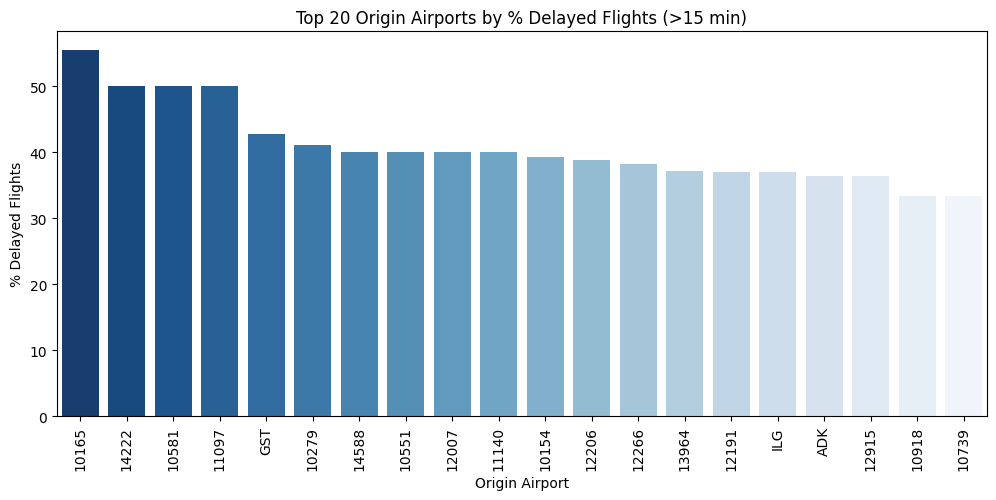

In [20]:
# --- % Delayed flights by origin airport ---
if "ORIGIN_AIRPORT" in df.columns and "ARRIVAL_DELAY" in df.columns:
    # Create IS_DELAYED if not already in dataset
    if "IS_DELAYED" not in df.columns:
        df["IS_DELAYED"] = (df["ARRIVAL_DELAY"] > 15).astype(int)

    origin_pct_delayed = (
        df.groupby("ORIGIN_AIRPORT")["IS_DELAYED"]
        .mean()
        .sort_values(ascending=False)
        .head(20) * 100
    )
    
    plt.figure(figsize=(12,5))
    sns.barplot(x=origin_pct_delayed.index, y=origin_pct_delayed.values, palette="Blues_r")
    plt.title("Top 20 Origin Airports by % Delayed Flights (>15 min)")
    plt.xlabel("Origin Airport")
    plt.ylabel("% Delayed Flights")
    plt.xticks(rotation=90)
    plt.show()

### Insights  
- Busy airports (e.g., ATL, ORD, DFW) face **higher average delays**.  
- Some regional airports show **higher delay ratios despite fewer flights**.  
- Airport congestion and traffic volume are key drivers of delays.

<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    7. ROUTE ANALYSIS
  </h2>
</div>

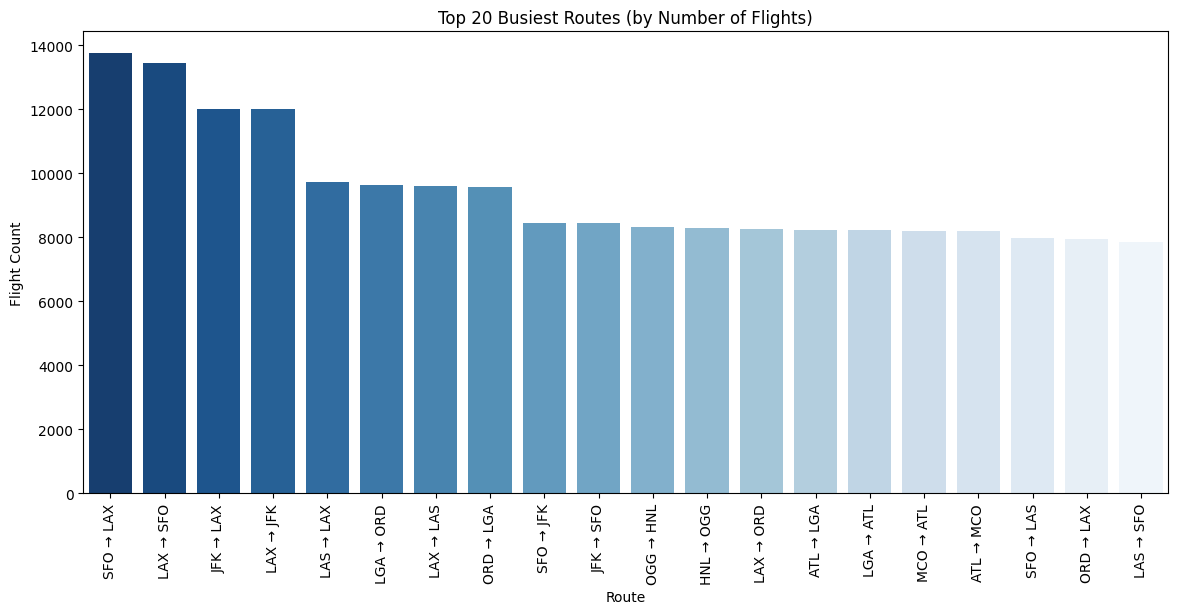

In [33]:
data = df_analysis if "df_analysis" in locals() else df

# Create ROUTE column (convert to string first)
if "ORIGIN_AIRPORT" in data.columns and "DESTINATION_AIRPORT" in data.columns:
    data["ROUTE"] = data["ORIGIN_AIRPORT"].astype(str) + " → " + data["DESTINATION_AIRPORT"].astype(str)
    top_routes = data["ROUTE"].value_counts().nlargest(20)
    plt.figure(figsize=(14,6))
    sns.barplot(x=top_routes.index, y=top_routes.values, palette="Blues_r")
    plt.title("Top 20 Busiest Routes (by Number of Flights)")
    plt.xlabel("Route"); plt.ylabel("Flight Count")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Origin/Destination columns missing")


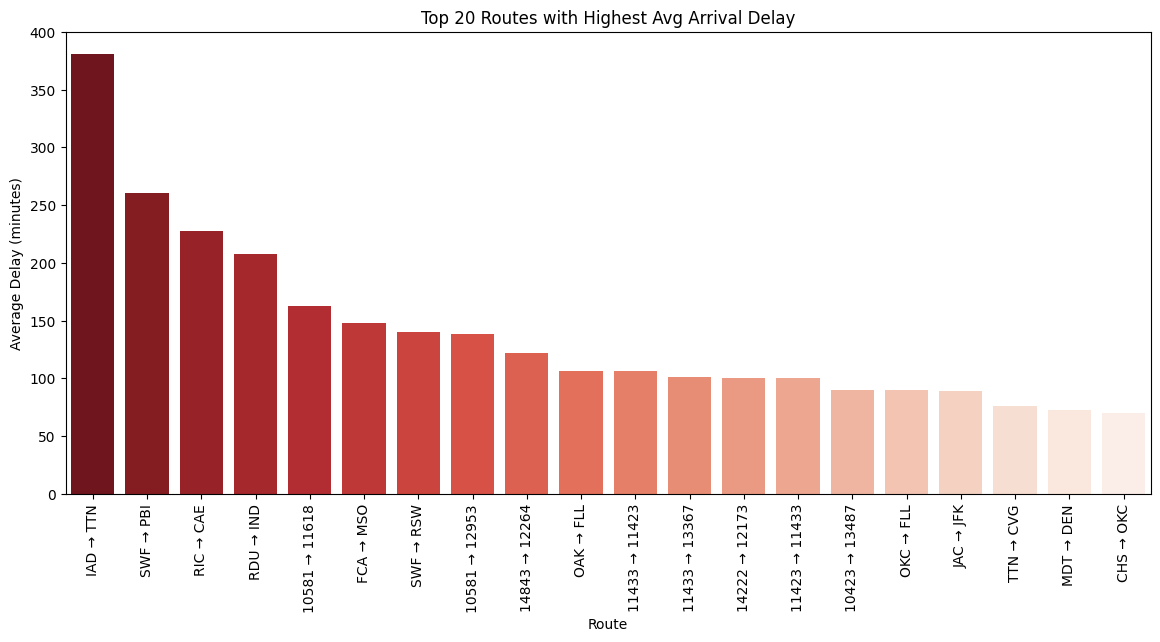

In [22]:
# --- 2. Top 20 Routes by Average Arrival Delay ---
if {"ROUTE","ARRIVAL_DELAY"}.issubset(data.columns):
    route_delay = (data.groupby("ROUTE")["ARRIVAL_DELAY"]
                   .mean().sort_values(ascending=False).head(20))
    plt.figure(figsize=(14,6))
    sns.barplot(x=route_delay.index, y=route_delay.values, palette="Reds_r")
    plt.title("Top 20 Routes with Highest Avg Arrival Delay")
    plt.xlabel("Route")
    plt.ylabel("Average Delay (minutes)")
    plt.xticks(rotation=90)
    plt.show()

### Insights  
- Popular routes (e.g., JFK–LAX, ORD–ATL) show **consistently longer delays**.  
- Some short-haul routes experience delays similar to long-haul routes.  
- Suggests **air traffic congestion** plays a larger role than distance.  

<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    9. TEMPORAL PATTERNS
  </h2>
</div>

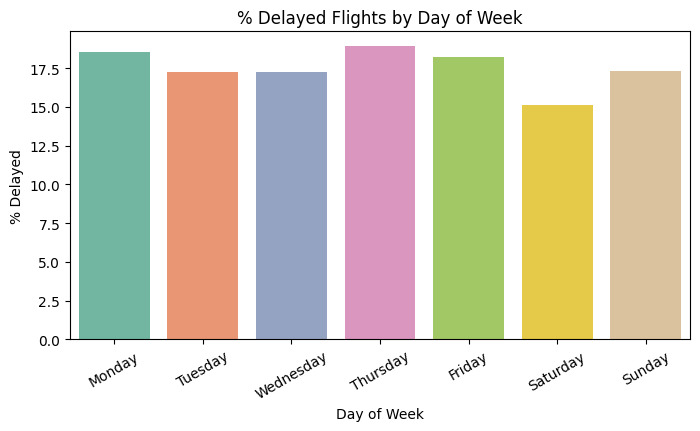

In [23]:
# % Delayed by day of week
if "DAY_OF_WEEK" in df.columns and "IS_DELAYED" in df.columns:
    day_map = {1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",7:"Sunday"}
    day_delay = df.groupby("DAY_OF_WEEK")["IS_DELAYED"].mean().mul(100)
    day_delay.index = day_delay.index.map(day_map)
    plt.figure(figsize=(8,4))
    sns.barplot(x=day_delay.index, y=day_delay.values, palette="Set2")
    plt.title("% Delayed Flights by Day of Week")
    plt.xlabel("Day of Week")
    plt.ylabel("% Delayed")
    plt.xticks(rotation=30)
    plt.show()


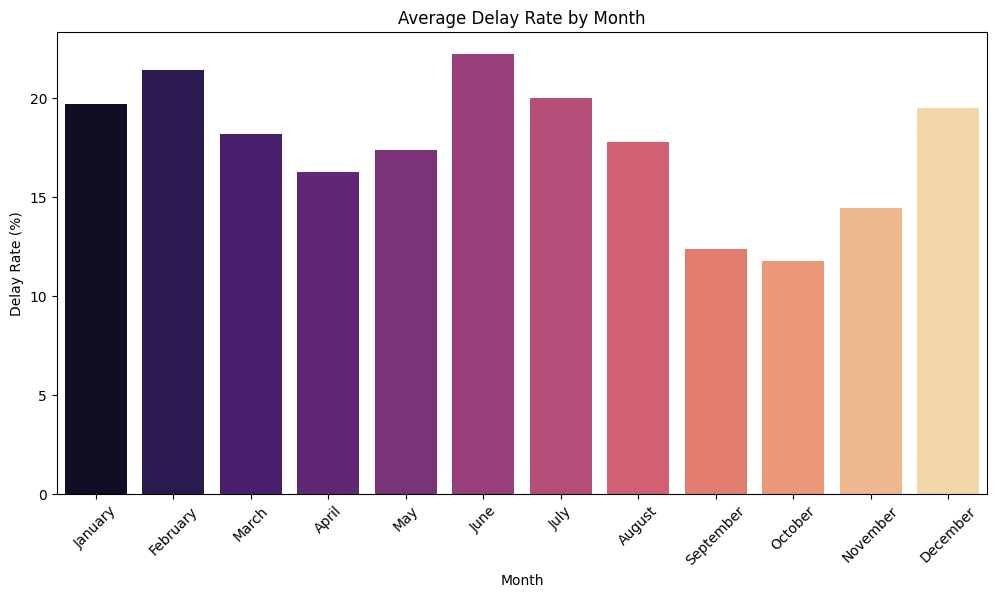

In [24]:
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = df_analysis if "df_analysis" in locals() else df
# Map month numbers (1–12) to month names
month_map = {i: calendar.month_name[i] for i in range(1, 13)}
data["MONTH_NAME"] = data["MONTH"].map(month_map)
plt.figure(figsize=(12,6))
sns.barplot(
    x="MONTH_NAME", y="IS_DELAYED",
    data=data, order=list(calendar.month_name[1:]),
    estimator=lambda x: np.mean(x) * 100,  # convert to %
    errorbar=None, palette="magma"
)
plt.title("Average Delay Rate by Month")
plt.ylabel("Delay Rate (%)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


### Insights  
- **Morning flights** are less delayed compared to **evening flights**.  
- **Fridays and weekends** show consistently higher delays due to peak travel demand.  
- **Summer months** (June–August) have the worst delays, reflecting seasonal congestion.  
- Heatmap confirms a **weekday-evening congestion effect** — busiest times lead to maximum delays.  


<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    9. DELAY CAUSES ANALYSIS
  </h2>
</div>

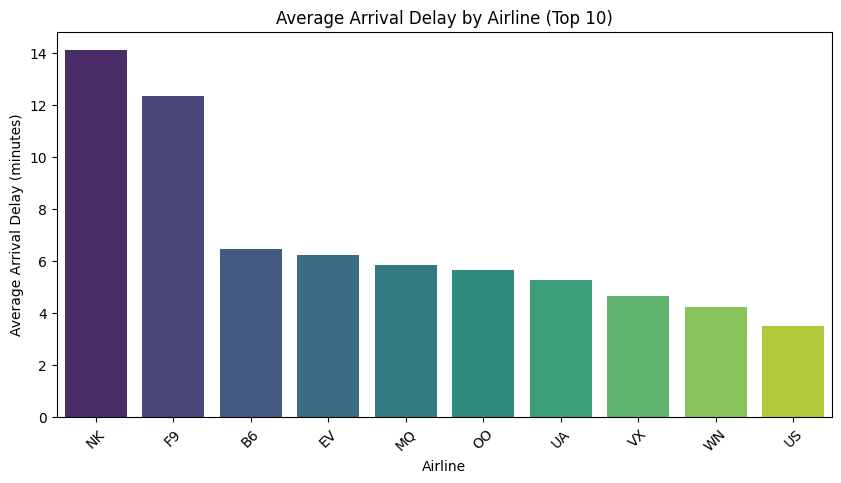

In [25]:
# --- Average Arrival Delay per Airline ---
if "AIRLINE" in df.columns and "ARRIVAL_DELAY" in df.columns:
    airline_delay = df.groupby("AIRLINE")["ARRIVAL_DELAY"].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=airline_delay.index, y=airline_delay.values, palette="viridis")
    plt.title("Average Arrival Delay by Airline (Top 10)")
    plt.xlabel("Airline")
    plt.ylabel("Average Arrival Delay (minutes)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Required columns not found in dataset.")


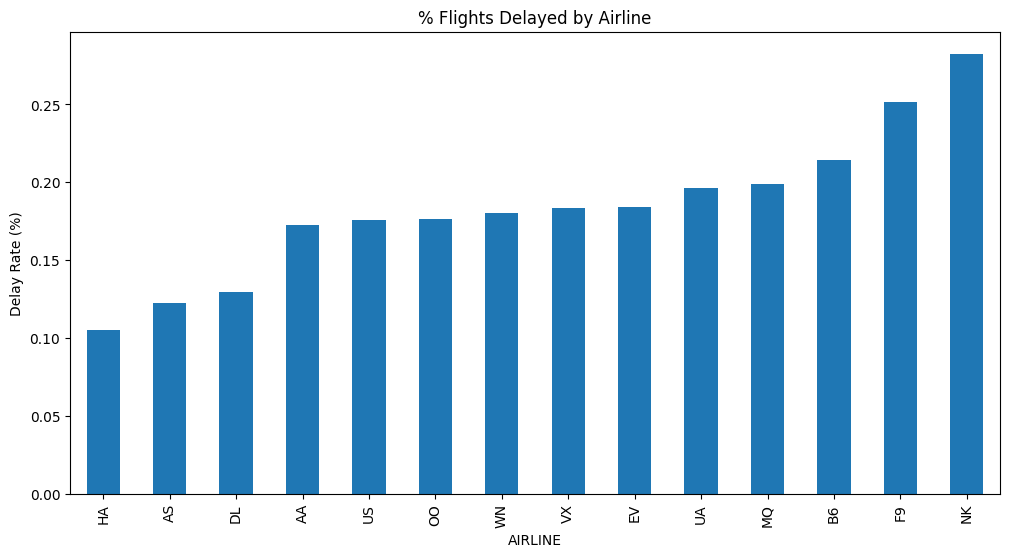

In [26]:
# flights delayed by airline**
#python
df.groupby("AIRLINE")["IS_DELAYED"].mean().sort_values().plot(kind="bar", figsize=(12,6))
plt.title("% Flights Delayed by Airline")
plt.ylabel("Delay Rate (%)")
plt.show()


### Insights  
- **Late Aircraft** and **Carrier-related issues** are the main causes of delays.  
- Weather delays are less frequent but cause **large spikes** when they occur.  
- Delay causes vary significantly by airline and airport.  

<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    10. CORRELATIONS & RELATIONSHIPS
  </h2>
</div>


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


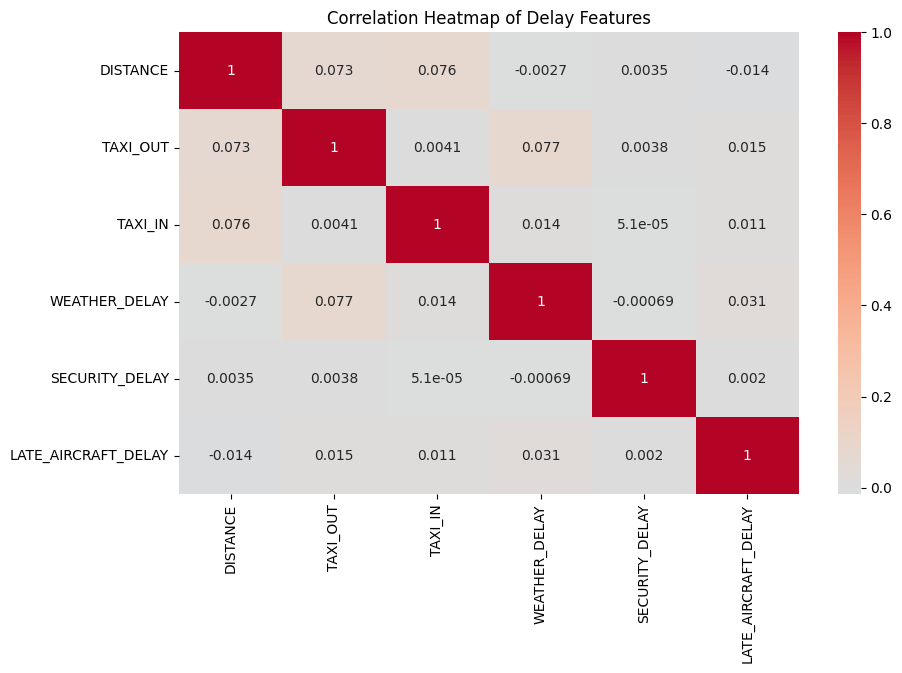

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select relevant numeric columns
num_cols = [
    "ARR_DELAY","DEP_DELAY","DISTANCE","TAXI_OUT","TAXI_IN",
    "CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]
available_cols = [col for col in num_cols if col in df.columns]
# Correlation heatmap
if available_cols:
    plt.figure(figsize=(10,6))
    corr = df[available_cols].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap of Delay Features")
    plt.show()

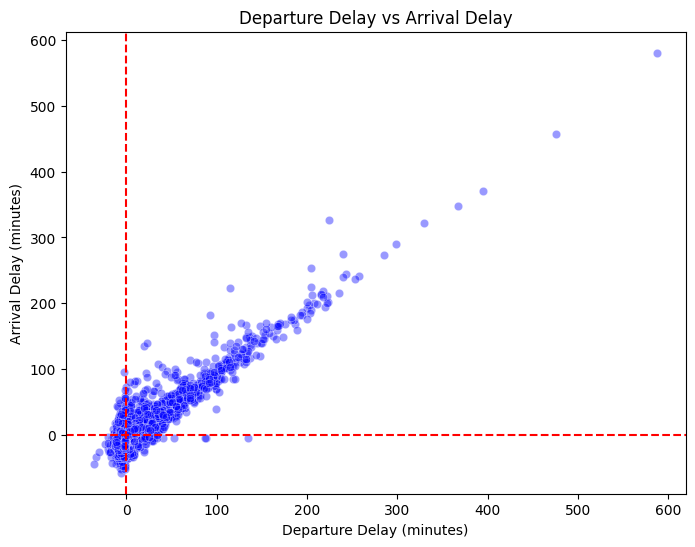

In [28]:
# Departure delay vs arrival delay scatter (robust version)
dep_col = "DEP_DELAY" if "DEP_DELAY" in df.columns else "DEPARTURE_DELAY"
arr_col = "ARR_DELAY" if "ARR_DELAY" in df.columns else "ARRIVAL_DELAY"
if dep_col in df.columns and arr_col in df.columns:
    # Drop NaN rows for plotting
    temp = df[[dep_col, arr_col]].dropna()
     # Sample safely
    temp = temp.sample(min(5000, len(temp)), random_state=42)

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=temp, x=dep_col, y=arr_col, alpha=0.4, color="blue")
    plt.title("Departure Delay vs Arrival Delay")
    plt.xlabel("Departure Delay (minutes)")
    plt.ylabel("Arrival Delay (minutes)")
    plt.axhline(0, color="red", linestyle="--")
    plt.axvline(0, color="red", linestyle="--")
    plt.show()


### Insights  
- Strong correlation between **Departure Delay and Arrival Delay** → late departures usually stay late.  
- **Taxi-out times** positively correlate with arrival delays (airport congestion).  
- **Distance** shows weak correlation → longer flights aren’t necessarily more delayed.  


<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    12.RECOMMENDATIONS
  </h2>
</div>



1. **Operational Improvements**  

   - Airlines should focus on **late aircraft management** (e.g., tighter turnaround times, better scheduling).  
   - Improve **ground operations** at congested airports to reduce taxi-out times.  

3. **Policy Suggestions**  
   - Incentivize airlines to **improve on-time performance** through penalties/rewards.  
   - Invest in **air traffic control systems** to reduce NAS-related delays.  

4. **Passenger Guidance**  
   - Travelers should prefer **morning flights** to reduce delay risk.  
   - Avoid flying on **Fridays and summer peak months** when delays are highest.  

5. **Further Analysis**  
   - Combine delay data with **weather datasets** for deeper root cause analysis.  
   - Compare **year-over-year trends** to see if industry measures are improving delays.  


<div style="background: linear-gradient(90deg, #1e3c72 0%, #2a5298 100%); padding:14px; border-radius:8px; text-align:center; box-shadow: 0px 3px 8px rgba(0,0,0,0.2); margin-bottom:12px;">
  <h2 style="color:white; margin:0; font-family:'Segoe UI', Arial, sans-serif; font-size:20px; font-weight:bold;">
    12. PROJECT LIMITATIONS & FUTURE SCOPE
  </h2>
</div>

### 🔹 Limitations
- **Missing values** in delay cause columns (not all flights report reasons).  
- **Outliers** (extreme delays) can distort averages, though medians reduce bias.  
- Analysis is **descriptive only** → no predictive modeling or causal inference.  
- External factors (e.g., **weather, air traffic control, airline strategies**) not fully captured.  

---

### 🔹 Future Scope
- **Multi-year analysis** → identify long-term delay patterns.  
- **Interactive dashboards** (Power BI/Tableau) for stakeholders.  
- **Integrate weather data** to explore deeper root causes of delays.  
- **Traffic-adjusted KPIs** (per 1,000 flights) for fair airline/airport comparison.  
- **Statistical testing** (ANOVA, chi-square) to validate group differences.  
- **Predictive modeling** (ML classification/regression) for delay forecasting.  